In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.model_selection import train_test_split

In [21]:
import tensorflow as tf
import keras


In [22]:
print(tf.__version__)
print(keras.__version__)

1.12.0
2.2.4


In [23]:
with tf.device('/gpu:0'):
      a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
      b = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[3, 2], name='b')
c = tf.matmul(a, b)
# Creates a session with log_device_placement set to True.
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))
# Runs the op.
print(sess.run(c))

InvalidArgumentError: Cannot assign a device for operation a_2: Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:XLA_CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[node a_2 (defined at <ipython-input-15-4101a602e040>:2)  = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [2,3] values: [1 2 3]...>, _device="/device:GPU:0"]()]]

Caused by op 'a_2', defined at:
  File "/opt/conda/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "/opt/conda/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/opt/conda/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/opt/conda/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 127, in start
    self.asyncio_loop.run_forever()
  File "/opt/conda/lib/python3.6/asyncio/base_events.py", line 421, in run_forever
    self._run_once()
  File "/opt/conda/lib/python3.6/asyncio/base_events.py", line 1431, in _run_once
    handle._run()
  File "/opt/conda/lib/python3.6/asyncio/events.py", line 145, in _run
    self._callback(*self._args)
  File "/opt/conda/lib/python3.6/site-packages/tornado/platform/asyncio.py", line 117, in _handle_events
    handler_func(fileobj, events)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 450, in _handle_events
    self._handle_recv()
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 480, in _handle_recv
    self._run_callback(callback, msg)
  File "/opt/conda/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 432, in _run_callback
    callback(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/tornado/stack_context.py", line 276, in null_wrapper
    return fn(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 233, in dispatch_shell
    handler(stream, idents, msg)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 208, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/opt/conda/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 537, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/opt/conda/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-15-4101a602e040>", line 2, in <module>
    a = tf.constant([1.0, 2.0, 3.0, 4.0, 5.0, 6.0], shape=[2, 3], name='a')
  File "/datasets/home/75/875/jixian/.local/lib/python3.6/site-packages/tensorflow/python/framework/constant_op.py", line 214, in constant
  File "/datasets/home/75/875/jixian/.local/lib/python3.6/site-packages/tensorflow/python/util/deprecation.py", line 488, in new_func
  File "/datasets/home/75/875/jixian/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 3274, in create_op
  File "/datasets/home/75/875/jixian/.local/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1770, in __init__

InvalidArgumentError (see above for traceback): Cannot assign a device for operation a_2: Operation was explicitly assigned to /device:GPU:0 but available devices are [ /job:localhost/replica:0/task:0/device:CPU:0, /job:localhost/replica:0/task:0/device:XLA_CPU:0 ]. Make sure the device specification refers to a valid device.
	 [[node a_2 (defined at <ipython-input-15-4101a602e040>:2)  = Const[dtype=DT_FLOAT, value=Tensor<type: float shape: [2,3] values: [1 2 3]...>, _device="/device:GPU:0"]()]]


In [6]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

In [7]:
images = pd.read_csv('hmnist_64_64_L.csv')
images = np.array(images) #dim = (4097,1)

In [8]:
X = images[:,0:4096]
num_samples = len(X)
X = np.reshape(X, (num_samples,64,64))
print(X.shape)
y = images[:,4096]    #label: 8 class, index 1,2,...8


(5000, 64, 64)


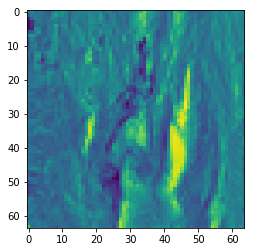

In [9]:
plt.imshow(X[500])

In [10]:
X_reshaped = np.reshape(X, (num_samples,64,64,1))/255.0
X_train, X_test, y_train, y_test = train_test_split(X_reshaped, y, test_size=0.2, random_state=42)
one_hot_y_train = tf.keras.utils.to_categorical(y_train-1, num_classes=8)  # y_train is labeled 1,2,..8, so minus 1, 
one_hot_y_test = tf.keras.utils.to_categorical(y_test-1, num_classes=8)

pixel_dim = 4096
epochs = 1
batch_size = 128

In [11]:
def createModel():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu',input_shape=(64,64,1)))
    #model.add(Conv2D(32, (3, 3), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    #model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    #model.add(Conv2D(64, (3, 3), activation='relu'))
    #model.add(MaxPooling2D(pool_size=(2, 2)))
    #model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    #model.add(Dropout(0.5))
    model.add(Dense(8, activation='softmax'))
    
    return model

In [12]:
model1= createModel()
model1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 32)        320       
_________________________________________________________________
dropout_1 (Dropout)          (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 31, 31, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 61504)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               7872640   
__________

In [13]:
model1.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [14]:
history = model1.fit(X_train, one_hot_y_train, epochs=5, batch_size=batch_size)

Epoch 1/5
4000/4000 [==============================] - 123s 31ms/step - loss: 2.4895 - acc: 0.2625
Epoch 2/5
4000/4000 [==============================] - 121s 30ms/step - loss: 1.3076 - acc: 0.4450
Epoch 3/5
4000/4000 [==============================] - 120s 30ms/step - loss: 1.1957 - acc: 0.4940
Epoch 4/5
4000/4000 [==============================] - 122s 31ms/step - loss: 1.0931 - acc: 0.5477
Epoch 5/5
4000/4000 [==============================] - 124s 31ms/step - loss: 1.0170 - acc: 0.5940


In [14]:
model1.evaluate(X_test, one_hot_y_test)

1000/1000 [==============================] - 6s 6ms/step


[1.2033655796051026, 0.595]